# Hvalfjörður, Iceland

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from subprocess import check_call

from datetime import datetime
from pathlib import Path

import config
import cson_forge

## Define the grid

Specify the grid name and parameters defining its geometry and MPI domain decomposition.

2025-11-24 02:53:34 - INFO - === Creating the horizontal grid ===
2025-11-24 02:53:34 - INFO - Total time: 0.149 seconds
2025-11-24 02:53:34 - INFO - ================================================================================================
2025-11-24 02:53:34 - INFO - === Deriving the mask from coastlines ===
2025-11-24 02:53:35 - INFO - Total time: 0.480 seconds
2025-11-24 02:53:35 - INFO - ================================================================================================
2025-11-24 02:53:35 - INFO - === Generating the topography using ETOPO5 data and hmin = 5.0 meters ===
2025-11-24 02:53:35 - INFO - Reading the topography data: 0.075 seconds
2025-11-24 02:53:35 - INFO - Regridding the topography: 0.013 seconds
2025-11-24 02:53:35 - INFO - Domain-wide topography smoothing: 0.030 seconds
2025-11-24 02:53:37 - INFO - Local topography smoothing: 1.778 seconds
2025-11-24 02:53:37 - INFO - Total time: 1.903 seconds
2025-11-24 02:53:37 - INFO - ========================

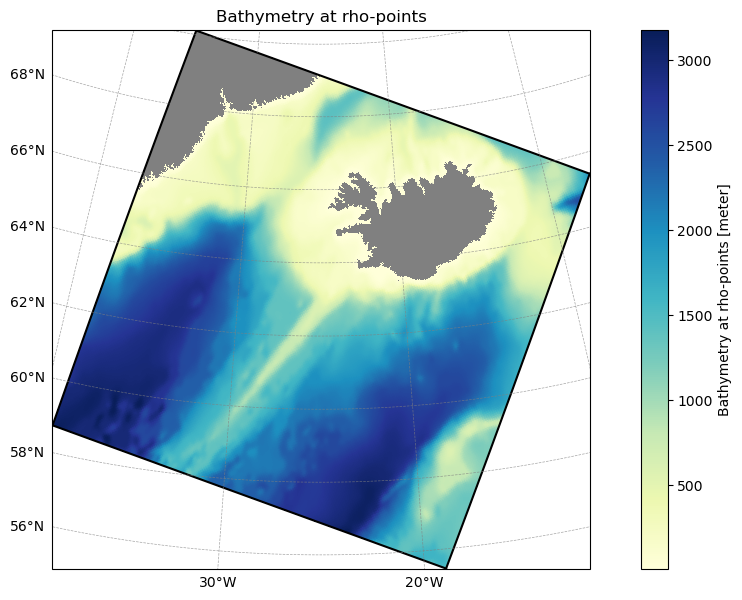

In [3]:
model_name = "roms-marbl"
grid_name = "hvalfjörður-0"

start_time = datetime(2024, 1, 1)
end_time = datetime(2024, 1, 2)

boundaries={
        "south": True,
        "east": True,
        "north": True,
        "west": True, 
    }

np_eta = 16 # number of partitions in eta (y) 
np_xi = 16 # number of partitions in xi (x) 

grid_kwargs = dict(
    nx=512,  # number of grid points in x-direction
    ny=512,  # number of grid points in y-direction
    size_x=1280,  # domain size in x-direction (in km)
    size_y=1280,  # domain size in y-direction (in km)
    center_lon=-25,  # longitude of the center of the domain
    center_lat=63,  # latitude of the center of the domain
    rot=-20,  # rotation of the grid (in degrees)
    N=100,  # number of vertical layers
    verbose=True,
)

ocn = cson_forge.OcnModel(
    model_name=model_name,
    grid_name=grid_name,
    grid_kwargs=grid_kwargs,
    boundaries=boundaries,    
    start_time=start_time,
    end_time=end_time,
    np_eta=np_eta,
    np_xi=np_xi,
)
ocn.grid.plot()

In [4]:
ocn.prepare_source_data(clobber=False)

⬇️  Downloading GLORYS_REGIONAL for 2024-01-01 → cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_hvalfjörður-0_20240101.nc


INFO - 2025-11-24T02:53:40Z - Selected dataset version: "202311"
2025-11-24 02:53:40 - INFO - Selected dataset version: "202311"
INFO - 2025-11-24T02:53:40Z - Selected dataset part: "default"
2025-11-24 02:53:40 - INFO - Selected dataset part: "default"
Numba: Attempted to fork from a non-main thread, the TBB library may be in an invalid state in the child process.
INFO - 2025-11-24T02:53:44Z - Starting download. Please wait...
2025-11-24 02:53:44 - INFO - Starting download. Please wait...


  0%|          | 0/38 [00:00<?, ?it/s]

2025-11-24 02:53:52 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-24 02:53:52 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-24 02:53:52 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-24 02:53:52 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-24 02:53:52 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-24 02:53:52 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
INFO - 2025-11-24T02:53:52Z - Successfully downloaded to /Users/mclong/cson-forge-data/source-data/GLORYS_REGIONAL/cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_hvalfjörður-0_20240101.nc
2025-11-24 02:53:52 - INFO -

⬇️  Downloading GLORYS_REGIONAL for 2024-01-02 → cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_hvalfjörður-0_20240102.nc


INFO - 2025-11-24T02:53:55Z - Selected dataset version: "202311"
2025-11-24 02:53:55 - INFO - Selected dataset version: "202311"
INFO - 2025-11-24T02:53:55Z - Selected dataset part: "default"
2025-11-24 02:53:55 - INFO - Selected dataset part: "default"
INFO - 2025-11-24T02:53:59Z - Starting download. Please wait...
2025-11-24 02:53:59 - INFO - Starting download. Please wait...


  0%|          | 0/38 [00:00<?, ?it/s]

2025-11-24 02:54:07 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-24 02:54:07 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-24 02:54:07 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-24 02:54:07 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-24 02:54:07 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
2025-11-24 02:54:07 - WARNING - Connection pool is full, discarding connection: s3.waw3-1.cloudferro.com. Connection pool size: 10
INFO - 2025-11-24T02:54:07Z - Successfully downloaded to /Users/mclong/cson-forge-data/source-data/GLORYS_REGIONAL/cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_hvalfjörður-0_20240102.nc
2025-11-24 02:54:07 - INFO -

✔️  TPXO dataset verified at: /Users/mclong/cson-forge-data/source-data/TPXO/TPXO10.v2
✔️  Using existing BGC dataset: /Users/mclong/cson-forge-data/source-data/UNIFIED_BGC/BGCdataset.nc


In [5]:
inputs = ocn.generate_inputs(clobber=True)

2025-11-24 02:54:07 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_hvalfjörður-0/roms_grid.nc
2025-11-24 02:54:07 - INFO - Sea surface height will NOT be used to adjust depth coordinates.



▶️  [1/9] Writing ROMS grid...

▶️  [2/9] Generating initial conditions...


2025-11-24 02:54:22 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_hvalfjörður-0/roms_initial_conditions.nc


[########################################] | 100% Completed | 177.00 s


2025-11-24 02:57:22 - INFO - No path specified for ERA5 source; defaulting to ARCO ERA5 dataset on Google Cloud.



▶️  [3/9] Generating surface forcing (physics)...


2025-11-24 02:58:37 - INFO - Data will be interpolated onto the grid coarsened by factor 2. Remember to set `interp_frc = 1` in your `bulk_frc.opt` ROMS option file.
2025-11-24 02:58:46 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_hvalfjörður-0/roms_surface_forcing_202401.nc


[########################################] | 100% Completed | 8.63 sms


2025-11-24 02:59:00 - INFO - Data will be interpolated onto the grid coarsened by factor 2. Remember to set `interp_frc = 1` in your `bgc.opt` ROMS option file.



▶️  [4/9] Generating surface forcing (BGC)...


2025-11-24 02:59:00 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_hvalfjörður-0/roms_surface_forcing_bgc_clim.nc


[########################################] | 100% Completed | 106.67 ms


2025-11-24 02:59:00 - INFO - Sea surface height will NOT be used to adjust depth coordinates.



▶️  [5/9] Generating boundary forcing (physics)...


2025-11-24 02:59:03 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_hvalfjörður-0/roms_boundary_forcing_202401.nc


[########################################] | 100% Completed | 535.15 ms


2025-11-24 02:59:04 - INFO - Sea surface height will NOT be used to adjust depth coordinates.



▶️  [6/9] Generating boundary forcing (BGC)...


2025-11-24 02:59:08 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_hvalfjörður-0/roms_boundary_forcing_bgc_clim.nc


[########################################] | 100% Completed | 18.03 s

▶️  [7/9] Generating tidal forcing...


2025-11-24 02:59:29 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_hvalfjörður-0/roms_tidal_forcing.nc


[########################################] | 100% Completed | 1.92 sms

▶️  [8/9] Generating river forcing...


2025-11-24 02:59:31 - INFO - No river indices provided. Identify all rivers within the ROMS domain and assign each of them to the nearest coastal point.
2025-11-24 02:59:39 - WARNING - No records found at or after the end_time: 2024-01-02 00:00:00.
2025-11-24 02:59:39 - INFO - Compute climatology for river forcing.
2025-11-24 02:59:39 - INFO - Writing the following NetCDF files:
/Users/mclong/cson-forge-data/input-data/roms-marbl_hvalfjörður-0/roms_rivers.nc



▶️  [9/9] Partitioning input files across tiles...

✅ All input files generated and partitioned.

📄  Wrote ROMSInputs blueprint to /Users/mclong/codes/cson-forge/workflows/blueprints/roms-marbl_hvalfjörður-0/blueprint_roms-marbl-hvalfjörður-0.yml


### Quick look at some forcing

[########################################] | 100% Completed | 18.21 s


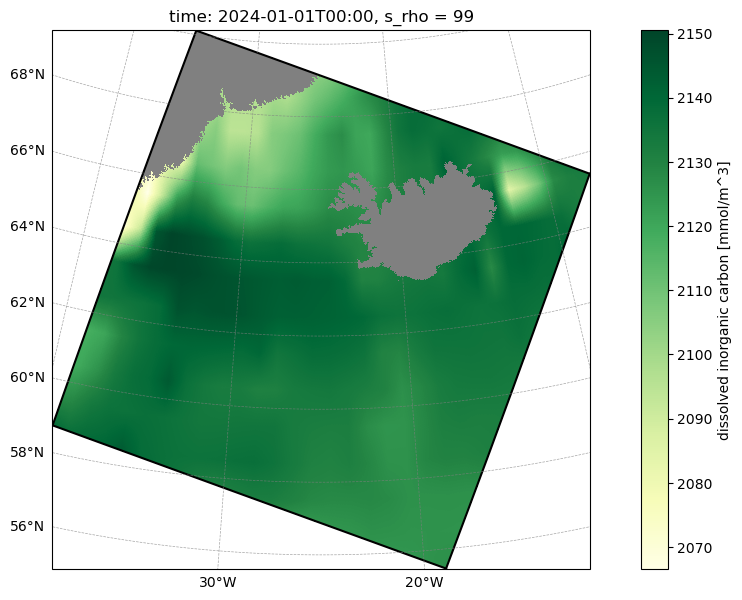

In [6]:
inputs["initial_conditions"].plot("DIC", s=-1)

[########################################] | 100% Completed | 517.29 ms


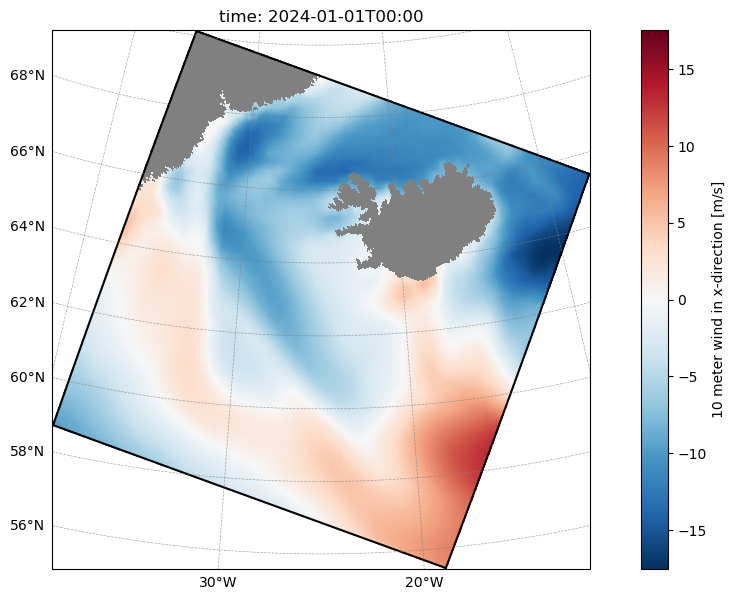

In [7]:
inputs["surface_forcing"].plot("uwnd", time=0)

## Build the model

Apply templating to source code and input files, then build the model

In [8]:
parameters = {
    "param.opt": dict(NP_XI=np_xi, NP_ETA=np_eta, NX=ocn.grid.nx, NY=ocn.grid.ny, NK=ocn.grid.N),
    "river_frc.opt": dict(nriv=inputs["rivers"].ds.sizes["nriver"]),
}

ocn.build(parameters, clean=True)

Build token: 20251124T030204Z-84ec91ca
Building roms-marbl for grid: hvalfjörður-0
roms-marbl opt_base_dir : /Users/mclong/codes/cson-forge/workflows/model-configs/opt_base/opt_base_roms-marbl-cson-default
ROMS opt_dir      : /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_hvalfjörður-0/opt
ROMS build_dir    : /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_hvalfjörður-0/bld
Input data path   : /Users/mclong/cson-forge-data/input-data/roms-marbl_hvalfjörður-0
ROMS_ROOT         : /Users/mclong/cson-forge-data/codes/ucla-roms
MARBL_ROOT        : /Users/mclong/cson-forge-data/codes/MARBL
Conda env         : roms_env
Logs              : /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_hvalfjörður-0/logs
Conda env 'roms_env' already exists.
Using compiler kind: gnu
Found 1 existing build(s) in /Users/mclong/codes/cson-forge/workflows/builds.yml.
ROMS repo already present at /Users/mclong/cson-forge-data/codes/ucla-roms
MARBL repo already present at /Users/mcl

PosixPath('/Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_hvalfjörður-0/exe/roms-marbl-hvalfjörður-0-20251124T030204Z-84ec91ca')

In [10]:
ocn.run(case="test.001")

Copying settings input files from /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_hvalfjörður-0/opt to /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_hvalfjörður-0/test.001:
  roms.in -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_hvalfjörður-0/test.001/roms.in
  marbl_in -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_hvalfjörður-0/test.001/marbl_in
  marbl_tracer_output_list -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_hvalfjörður-0/test.001/marbl_tracer_output_list
Rendering master settings file: roms.in
  Rendered roms.in -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_hvalfjörður-0/test.001/roms.in
Copying executable to run directory:
  /Users/mclong/codes/cson-forge/workflows/builds/roms-marbl_hvalfjörður-0/exe/roms-marbl-hvalfjörður-0-20251124T030204Z-84ec91ca -> /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_hvalfjörður-0/test.001/roms-marbl-hvalfjörður-0-20251124T030204Z-84ec91ca
Running model locally

RuntimeError: Model run failed with exit code 127. See log file for details: /Users/mclong/cson-forge-data/cson-forge-run/roms-marbl_hvalfjörður-0/test.001/test.001.20251124T032912Z.log